### Import Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [9]:
df_movies = pd.read_csv('../data/raw/movies_merge.csv')

### Counting null values

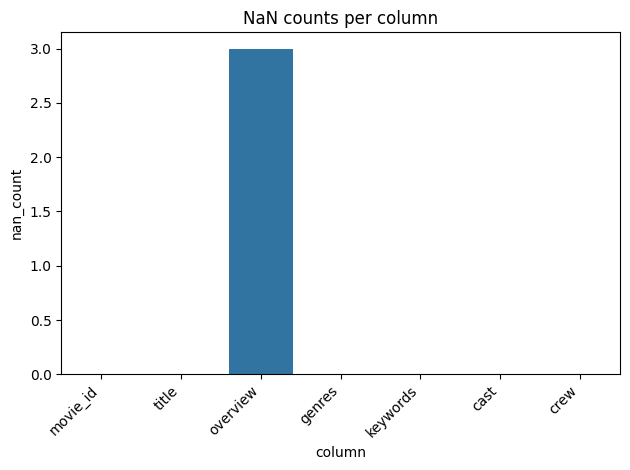

In [11]:
nan_counts = df_movies.isna().sum().reset_index()
nan_counts.columns = ["column", "nan_count"]

sns.barplot(data=nan_counts, x="column", y="nan_count")
plt.xticks(rotation=45, ha="right")
plt.title("NaN counts per column")
plt.tight_layout()
plt.show()

### Douplicated Values

In [17]:
dups = df_movies.duplicated(keep='first')
dup_count = dups.sum()

print(f"Total duplicate rows: {dup_count}")

subset_cols = ['movie_id','title','overview','genres','keywords','cast','crew']  
dup_by_subset = df_movies.duplicated(subset=subset_cols, keep='first').sum()
print(f"Duplicate rows based on {subset_cols}: {dup_by_subset}")

Total duplicate rows: 0
Duplicate rows based on ['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']: 0


### Frequent genres in the dataset